In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 读取数据
dataset = pd.read_csv('SupplyChain.csv', encoding='unicode_escape')
dataset.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [3]:
dataset.shape

(180519, 53)

In [4]:
# 查看缺失值
temp = dataset.isna().sum()
temp[temp>0]

Customer Lname              8
Customer Zipcode            3
Order Zipcode          155679
Product Description    180519
dtype: int64

##### Customer Name

In [5]:
# 我们把全名做出来
dataset['Customer FullName'] = dataset['Customer Fname'] + dataset['Customer Lname']
dataset['Customer FullName'].isna().sum()

8

In [6]:
# 还是会有nan，那就将他用‘-’代替
dataset['Customer Lname'].fillna('-', inplace=True)

In [7]:
dataset['Customer FullName'] = dataset['Customer Fname'] + dataset['Customer Lname']
dataset['Customer FullName'].isna().sum()

0

##### 'Customer Zipcode' 用户所在邮编

In [8]:
dataset['Customer Zipcode'][dataset['Customer Zipcode'].isna()]

35704   NaN
46440   NaN
82511   NaN
Name: Customer Zipcode, dtype: float64

##### 还有'用户所在街道'的特征，这两个特征大概率是线性相关的，没必要两个都保留

In [9]:
# 前两个的街道相同
dataset['Customer Street'][35704], dataset['Customer Street'][46440], dataset['Customer Street'][82511]

('Elk Grove', 'Elk Grove', 'El Monte')

In [10]:
# Elk Grove只有这两个样本，且Zipcode都缺失，只能自己补充
dataset[dataset['Customer Street'] == 'Elk Grove']['Customer Zipcode']

35704   NaN
46440   NaN
Name: Customer Zipcode, dtype: float64

In [11]:
# El Monte同理
dataset[dataset['Customer Street'] == 'El Monte']['Customer Zipcode']

82511   NaN
Name: Customer Zipcode, dtype: float64

In [12]:
# 用1 和 2 分别填充
dataset.loc[35704, 'Customer Zipcode'] = 1
dataset.loc[46440, 'Customer Zipcode'] = 1
dataset.loc[82511, 'Customer Zipcode'] = 2

In [13]:
# 查看填充后的结果
dataset[dataset['Customer Street'] == 'Elk Grove']['Customer Zipcode']
dataset[dataset['Customer Street'] == 'El Monte']['Customer Zipcode']

82511    2.0
Name: Customer Zipcode, dtype: float64

##### Order Zipcode订单邮编          155679个缺失，
##### 由于有‘订单所在州’这个特征，那邮编应该可以去掉
##### Product Description商品描述    180519 这是全nan呀

In [14]:
dataset.drop(columns=['Order Zipcode', 'Product Description'], inplace=True)
dataset.shape

(180519, 52)

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 52 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [16]:
dataset.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Card Id,Product Category Id,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35920.529972,5.443460,29.719955,...,141.232550,0.120647,2.127638,203.772096,183.107609,21.974989,692.509764,31.851451,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.434733,1.629246,9.813646,...,139.732492,0.466796,1.453451,132.273077,120.043670,104.433526,336.446807,15.640064,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,1.000000,2.000000,-33.937553,...,9.990000,-2.750000,1.000000,9.990000,7.490000,-4274.979980,19.000000,2.000000,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,...,50.000000,0.080000,1.000000,119.980003,104.379997,7.000000,403.000000,18.000000,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,...,59.990002,0.270000,1.000000,199.919998,163.990005,31.520000,627.000000,29.000000,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,...,199.990005,0.360000,3.000000,299.950012,247.399994,64.800003,1004.000000,45.000000,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,...,1999.989990,0.500000,5.000000,1999.989990,1939.989990,911.799988,1363.000000,76.000000,1999.989990,0.0


In [17]:
dataset.describe().loc['std']

Days for shipping (real)             1.623722
Days for shipment (scheduled)        1.374449
Benefit per order                  104.433526
Sales per customer                 120.043670
Late_delivery_risk                   0.497664
Category Id                         15.640064
Customer Id                       4162.918106
Customer Zipcode                 37542.434733
Department Id                        1.629246
Latitude                             9.813646
Longitude                           21.433241
Order Customer Id                 4162.918106
Order Id                         21045.379569
Order Item Cardprod Id             336.446807
Order Item Discount                 21.800901
Order Item Discount Rate             0.070415
Order Item Id                    52111.490959
Order Item Product Price           139.732492
Order Item Profit Ratio              0.466796
Order Item Quantity                  1.453451
Sales                              132.273077
Order Item Total                  

In [18]:
# 发现Product Status全为零
dataset['Product Status'].value_counts()

0    180519
Name: Product Status, dtype: int64

In [19]:
dataset.drop(columns=['Product Status'], inplace=True)

In [20]:
# 查看 object 类型特征
cat_cols = list(dataset.select_dtypes('object').columns)
num_cols = [i  for i in dataset.columns if i not in cat_cols]

In [21]:
# 数值特征热力图呈现
# cor = dataset[num_cols].corr()
# plt.figure(figsize=(20,20))
# sns.heatmap(cor, annot=True)

In [22]:
for i in cat_cols:
    print(dataset[i].value_counts())
    print('\n')

DEBIT       69295
TRANSFER    49883
PAYMENT     41725
CASH        19616
Name: Type, dtype: int64


Late delivery        98977
Advance shipping     41592
Shipping on time     32196
Shipping canceled     7754
Name: Delivery Status, dtype: int64


Cleats                  24551
Men's Footwear          22246
Women's Apparel         21035
Indoor/Outdoor Games    19298
Fishing                 17325
Water Sports            15540
Camping & Hiking        13729
Cardio Equipment        12487
Shop By Sport           10984
Electronics              3156
Accessories              1780
Golf Balls               1475
Girls' Apparel           1201
Golf Gloves              1070
Trade-In                  974
Video Games               838
Children's Clothing       652
Women's Clothing          650
Baseball & Softball       632
Hockey                    614
Cameras                   592
Toys                      529
Golf Shoes                524
Pet Supplies              492
Crafts                    484
Garde

In [23]:
# 邮件和密码已隐去
dataset.drop(columns=['Customer Email', 'Customer Password'],inplace=True)

In [24]:
# 商品照片也没啥用
dataset.drop(columns=['Product Image'], inplace=True)

#### 时间特征

In [25]:
# 发现了一个时间特征 'order date (DateOrders)'订单下单日期 和 shipping date (DateOrders) 发货日期
dataset['order date (DateOrders)'] = pd.to_datetime(dataset['order date (DateOrders)'], format='%m/%d/%Y %H:%M')
dataset['order date (DateOrders)']

0        2018-01-31 22:56:00
1        2018-01-13 12:27:00
2        2018-01-13 12:06:00
3        2018-01-13 11:45:00
4        2018-01-13 11:24:00
                 ...        
180514   2016-01-16 03:40:00
180515   2016-01-16 01:34:00
180516   2016-01-15 21:00:00
180517   2016-01-15 20:18:00
180518   2016-01-15 18:54:00
Name: order date (DateOrders), Length: 180519, dtype: datetime64[ns]

In [26]:
dataset['shipping date (DateOrders)'] = pd.to_datetime(dataset['shipping date (DateOrders)'], format='%m/%d/%Y %H:%M')
dataset['shipping date (DateOrders)']

0        2018-02-03 22:56:00
1        2018-01-18 12:27:00
2        2018-01-17 12:06:00
3        2018-01-16 11:45:00
4        2018-01-15 11:24:00
                 ...        
180514   2016-01-20 03:40:00
180515   2016-01-19 01:34:00
180516   2016-01-20 21:00:00
180517   2016-01-18 20:18:00
180518   2016-01-19 18:54:00
Name: shipping date (DateOrders), Length: 180519, dtype: datetime64[ns]

In [27]:
# 有了'order date (DateOrders)'订单下单日期 和 shipping date (DateOrders) 发货日期
# 还有 Days for shipping (real) 实际发货天数，Days for shipment (scheduled) 预计发货天数

In [28]:
# 订单下单日期
dataset[['Days for shipping (real)', 'Days for shipment (scheduled)', ]]

,Days for shipping (real),Days for shipment (scheduled)
0,3,4
1,5,4
2,4,4
3,3,4
4,2,4
...,...,...
180514,4,4
180515,3,2
180516,5,4
180517,3,4


In [29]:
(dataset['shipping date (DateOrders)'] - dataset['order date (DateOrders)']).dt.days

0         3
1         5
2         4
3         3
4         2
         ..
180514    4
180515    3
180516    5
180517    3
180518    4
Length: 180519, dtype: int64

In [30]:
# 那其实发货时间-下单时间，就是真实的的发货天数
(dataset['shipping date (DateOrders)'] - dataset['order date (DateOrders)']).dt.days == dataset['Days for shipping (real)']

0         True
1         True
2         True
3         True
4         True
          ... 
180514    True
180515    True
180516    True
180517    True
180518    True
Length: 180519, dtype: bool

In [31]:
# 好吧，有4657个异常值，两者不相等。。。
((dataset['shipping date (DateOrders)'] - dataset['order date (DateOrders)']).dt.days != dataset['Days for shipping (real)']).sum()

4657

In [32]:
# Late_delivery_risk发货是否延迟 应该等价于 实际发货天数-预计发货天数>0 则为1，否则为0

(np.where((dataset['Days for shipping (real)'] - dataset['Days for shipment (scheduled)'])>0, 1, 0) != dataset['Late_delivery_risk']).sum()

# 也有异常值

4423

#### 记得处理

#### 按不同的Market 对 Sales per customer进行探索

In [33]:
dataset.Market.value_counts()

LATAM           51594
Europe          50252
Pacific Asia    41260
USCA            25799
Africa          11614
Name: Market, dtype: int64

<AxesSubplot:title={'center':'Sales in different markets'}, xlabel='Market'>

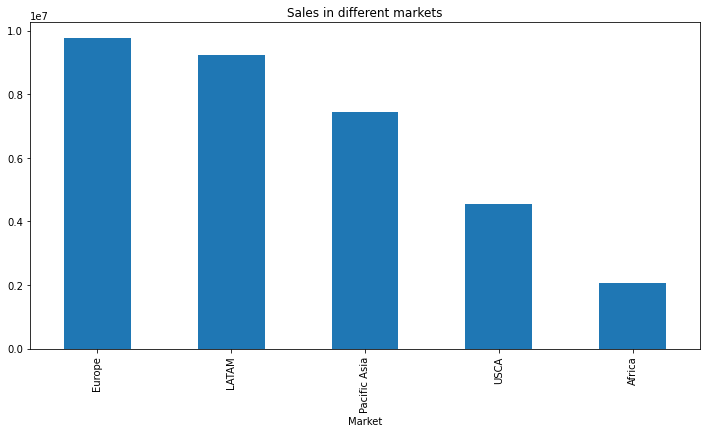

In [34]:
market = dataset.groupby('Market')
market['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title='Sales in different markets')

<AxesSubplot:title={'center':'Sales in different order region'}, xlabel='Order Region'>

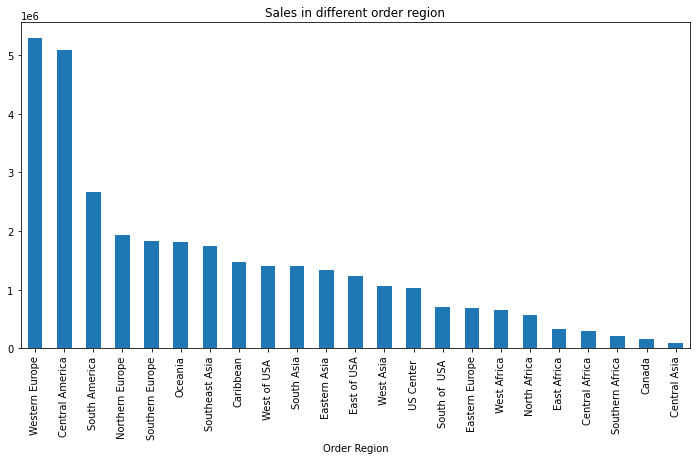

In [35]:
# 基于Order Region
order_region = dataset.groupby('Order Region')
order_region['Sales per customer'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(12,6), title='Sales in different order region')

<AxesSubplot:title={'center':'Sales in different category name'}, xlabel='Category Name'>

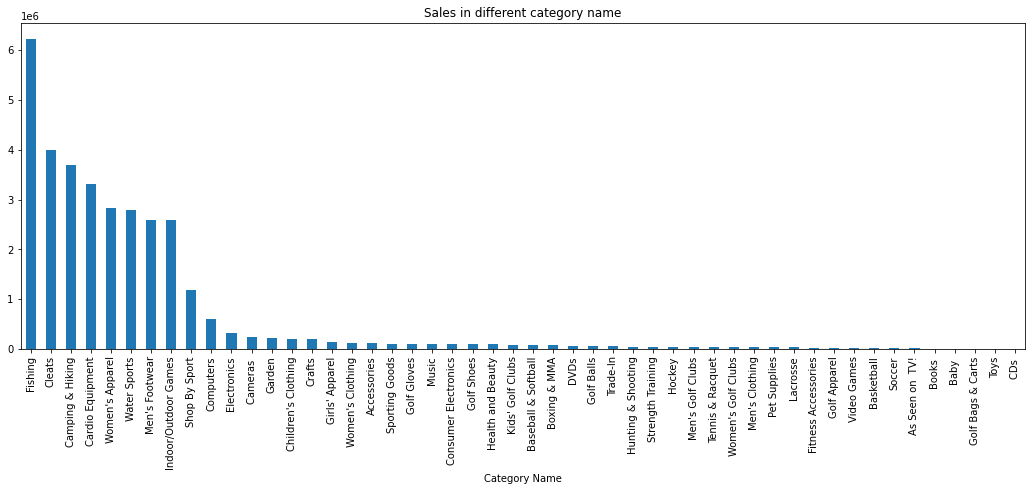

In [36]:
# 基于Category Name
cat_name = dataset.groupby('Category Name')
cat_name['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(18,6), title='Sales in different category name')

### 除了sum观察总的销售额以外，还可以用mean观察平均销售额

In [37]:
# 按照不同的时间维度(年，月，星期，小时)的趋势
# 创建时间戳索引

In [38]:
temp = pd.DatetimeIndex(dataset['order date (DateOrders)'])
temp

DatetimeIndex(['2018-01-31 22:56:00', '2018-01-13 12:27:00',
               '2018-01-13 12:06:00', '2018-01-13 11:45:00',
               '2018-01-13 11:24:00', '2018-01-13 11:03:00',
               '2018-01-13 10:42:00', '2018-01-13 10:21:00',
               '2018-01-13 10:00:00', '2018-01-13 09:39:00',
               ...
               '2016-01-16 06:49:00', '2016-01-16 06:49:00',
               '2016-01-16 06:28:00', '2016-01-16 06:07:00',
               '2016-01-16 05:04:00', '2016-01-16 03:40:00',
               '2016-01-16 01:34:00', '2016-01-15 21:00:00',
               '2016-01-15 20:18:00', '2016-01-15 18:54:00'],
              dtype='datetime64[ns]', name='order date (DateOrders)', length=180519, freq=None)

#### 笔记：DatetimeIndex.to_period(freq),将DatetimeIndex转换乘PeriodIndex
#### freq --> 'Y'年、 'M'月、 'D'日、 'H'时、 'T'分、 'S'秒 不区分大小写

In [39]:
# temp.to_period('y')
# temp.to_period('m')
# temp.to_period('d')
# temp.to_period('h')
# temp.to_period('t')
# temp.to_period('s')

In [40]:
# 将年月日切分
dataset['order_year'] = temp.year
dataset['order_month'] = temp.month
dataset['order_week_day'] = temp.weekday
dataset['order_hour'] = temp.hour
dataset['order_month_year'] = temp.to_period('m')

In [41]:
dataset[['order_year', 'order_month', 'order_week_day','order_hour','order_month_year']]

,order_year,order_month,order_week_day,order_hour,order_month_year
0,2018,1,2,22,2018-01
1,2018,1,5,12,2018-01
2,2018,1,5,12,2018-01
3,2018,1,5,11,2018-01
4,2018,1,5,11,2018-01
...,...,...,...,...,...
180514,2016,1,5,3,2016-01
180515,2016,1,5,1,2016-01
180516,2016,1,4,21,2016-01
180517,2016,1,4,20,2016-01


<AxesSubplot:title={'center':'Mean Sales in hour'}, xlabel='order_hour'>

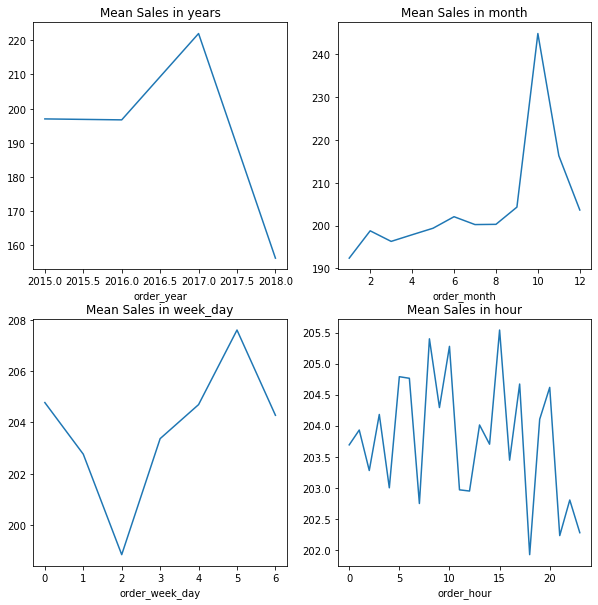

In [42]:
# 按不同时间维度对销售额进行探索
plt.figure(figsize=(10,10))
ax1 = plt.subplot(2,2,1)
df_year = dataset.groupby('order_year')
df_year['Sales'].mean().plot(kind='line', title='Mean Sales in years', ax=ax1)

ax2 = plt.subplot(2,2,2)
df_month = dataset.groupby('order_month')
df_month['Sales'].mean().plot(kind='line', title='Mean Sales in month', ax=ax2)

ax3 = plt.subplot(2,2,3)
df_week_day = dataset.groupby('order_week_day')
df_week_day['Sales'].mean().plot(kind='line', title='Mean Sales in week_day', ax=ax3)

ax4 = plt.subplot(2,2,4)
df_hour = dataset.groupby('order_hour')
df_hour['Sales'].mean().plot(kind='line', title='Mean Sales in hour', ax=ax4)

In [43]:
dataset['Product Price']

0         327.750000
1         327.750000
2         327.750000
3         327.750000
4         327.750000
             ...    
180514    399.980011
180515    399.980011
180516    399.980011
180517    399.980011
180518    399.980011
Name: Product Price, Length: 180519, dtype: float64

<AxesSubplot:xlabel='Product Price', ylabel='Sales per customer'>

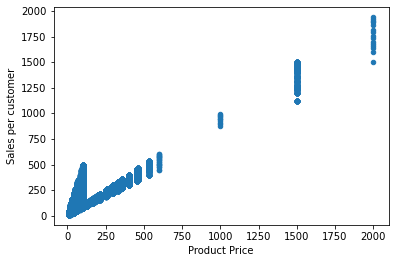

In [44]:
# 探索 Product Price与Sales per customer 相关性
# 可以直接用scatter可视化
dataset.plot(x='Product Price', y='Sales per customer',kind='scatter')